# Keep-it-dry! Model: K-Nearest Neighbor

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

## Read Data

In [2]:
datasets_dict = {}

datasets_dict['ii_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_adasyn.csv', index_col=0)
datasets_dict['ii_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_ros.csv', index_col=0)
datasets_dict['ii_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_rus.csv', index_col=0)
datasets_dict['ii_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smote.csv', index_col=0)
datasets_dict['ii_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smotenc_1.csv', index_col=0)

datasets_dict['ii_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_adasyn.csv', index_col=0)
datasets_dict['ii_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_ros.csv', index_col=0)
datasets_dict['ii_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_rus.csv', index_col=0)
datasets_dict['ii_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smote.csv', index_col=0)
datasets_dict['ii_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smotenc_1.csv', index_col=0)

datasets_dict['ii_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_adasyn.csv', index_col=0)
datasets_dict['ii_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_ros.csv', index_col=0)
datasets_dict['ii_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_rus.csv', index_col=0)
datasets_dict['ii_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smote.csv', index_col=0)
datasets_dict['ii_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smotenc_1.csv', index_col=0)

datasets_dict['ki_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_adasyn.csv', index_col=0)
datasets_dict['ki_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_ros.csv', index_col=0)
datasets_dict['ki_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_rus.csv', index_col=0)
datasets_dict['ki_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smote.csv', index_col=0)
datasets_dict['ki_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smotenc_1.csv', index_col=0)

datasets_dict['ki_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_adasyn.csv', index_col=0)
datasets_dict['ki_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_ros.csv', index_col=0)
datasets_dict['ki_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_rus.csv', index_col=0)
datasets_dict['ki_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smote.csv', index_col=0)
datasets_dict['ki_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smotenc_1.csv', index_col=0)

datasets_dict['ki_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_adasyn.csv', index_col=0)
datasets_dict['ki_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_ros.csv', index_col=0)
datasets_dict['ki_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_rus.csv', index_col=0)
datasets_dict['ki_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smote.csv', index_col=0)
datasets_dict['ki_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smotenc_1.csv', index_col=0)

## Dataset Selection

In [3]:
dataset_result = {}
dataset_result['dataset'] = []
dataset_result['training_accuracy'] = []
dataset_result['testing_accuracy'] = []
dataset_result['testing_f1_score'] = []

for title, data in datasets_dict.items():

    X_df = data.copy()
    y_df = X_df.pop('failure')
    object_cols = X_df.select_dtypes(include=['object']).columns
    X_df = X_df.drop(object_cols, axis=1)

    X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=.2, stratify=y_df, random_state=42)
    
    knn_dataset = KNeighborsClassifier()
    knn_dataset.fit(X_train, y_train)
    
    y_predict = knn_dataset.predict(X_val)

    dataset_result['dataset'].append(title)
    dataset_result['training_accuracy'].append(knn_dataset.score(X_train, y_train))
    dataset_result['testing_accuracy'].append(knn_dataset.score(X_val, y_val))
    dataset_result['testing_f1_score'].append(f1_score(y_val, y_predict))

In [4]:
df_result = pd.DataFrame(dataset_result)
df_result_sorted = df_result.sort_values(by='testing_f1_score', ascending=False)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

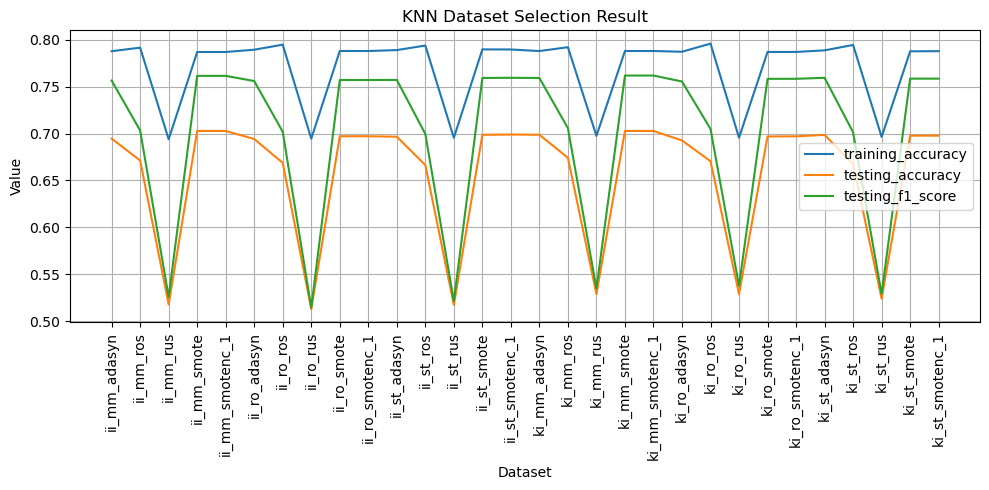

In [5]:
plt.figure(figsize=[10, 5])

sns.lineplot(data=df_result, x='dataset', y='training_accuracy', label='training_accuracy').grid(True)
sns.lineplot(data=df_result, x='dataset', y='testing_accuracy', label='testing_accuracy')
sns.lineplot(data=df_result, x='dataset', y='testing_f1_score', label='testing_f1_score')

plt.title("KNN Dataset Selection Result")
plt.ylabel("Value")
plt.xlabel("Dataset")
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

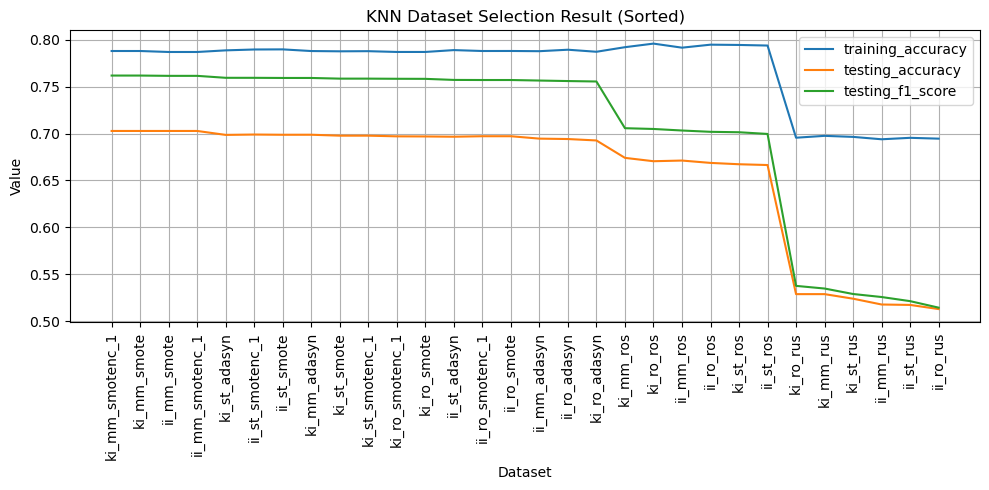

In [6]:
plt.figure(figsize=[10, 5])

sns.lineplot(data=df_result_sorted, x='dataset', y='training_accuracy', label='training_accuracy').grid(True)
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_accuracy', label='testing_accuracy')
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_f1_score', label='testing_f1_score')

plt.title("KNN Dataset Selection Result (Sorted)")
plt.ylabel("Value")
plt.xlabel("Dataset")
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

In [7]:
print(df_result_sorted['testing_f1_score'].head(5))

19    0.761777
18    0.761777
3     0.761457
4     0.761457
25    0.759374
Name: testing_f1_score, dtype: float64


### Dataset selection result

Based on F1-Score
1. ki_mm_smotenc_1
2. ki_mm_smote
3. ii_mm_smotenc_1
4. ii_mm_smote

Backup (other than SMOTE/SMOTENC/ADASYN)
1. ki_mm_ros

In [9]:
df_train = pd.read_csv('./../Preprocessing/kid_train_ki_mm_ros.csv', index_col=0)
df_test = pd.read_csv('./../Preprocessing/kid_test_ki_mm.csv', index_col=0)

In [10]:
df_test_id = df_test[['id']]
df_test.drop(columns=['id', 'product_code', 'product_code_F', 'product_code_G', 'product_code_H', 'product_code_I'], inplace=True)
df_test.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0.244996,5.0,6.0,6,4,0.206897,0.310345,0.250000,0.708671,0.256017,...,0.400116,0.414603,0.500608,0.425601,0.688620,0.234205,0.583833,0.370388,0.556451,0.392314
1,0.227814,5.0,6.0,6,4,0.379310,0.275862,0.000000,0.519851,0.462364,...,0.483236,0.570794,0.355351,0.446088,0.584667,0.556373,0.574945,0.452963,0.305774,0.304882
2,0.223986,5.0,6.0,6,4,0.275862,0.413793,0.166667,0.598460,0.291765,...,0.297672,0.534095,0.587033,0.426815,0.459347,0.209169,0.501178,0.635761,0.439102,0.414162
3,0.225574,5.0,6.0,6,4,0.275862,0.379310,0.416667,0.338600,0.339783,...,0.434342,0.540063,0.672089,0.280901,0.461428,0.390003,0.495860,0.280786,0.445355,0.356193
4,0.495719,5.0,6.0,6,4,0.482759,0.551724,0.333333,0.509892,0.552737,...,0.456810,0.613714,0.399438,0.408832,0.542093,0.438129,0.535060,0.337007,0.517543,0.541446


In [11]:
X_df = df_train[df_train.columns[:-1]]
y_df = df_train[df_train.columns[-1]]

## PCA

In [13]:
n_components_range = range(10, 23)  # Explore components from 10 to 22

best_n_components = None
best_score = -np.inf  # Initialize with a negative infinity

for n_components in n_components_range:
  # Apply PCA with current n_components
  pca = PCA(n_components=n_components)
  pca_data = pca.fit_transform(X_df)

  # Train linearsvc on transformed data
  model = KNeighborsClassifier()
  model.fit(pca_data, y_df)

  # Evaluate performance on testing set (e.g., using F1 score)
  score = model.score(pca.transform(X_df), y_df)
  print(f"{n_components} components score: {score}")

  # Update best component and score if performance improves
  if score > best_score:
    best_n_components = n_components
    best_score = score

print("Best number of components based on KNN performance:", best_n_components)

10 components score: 0.8129391520481812
11 components score: 0.8171454519382438
12 components score: 0.8176234405621147
13 components score: 0.8154246928923091
14 components score: 0.8168586587639214
15 components score: 0.8193680990392429
16 components score: 0.8165957650207925
17 components score: 0.8182687252043401
18 components score: 0.815639787773051
19 components score: 0.814659911094116
20 components score: 0.8133215429472779
21 components score: 0.8137039338463744
22 components score: 0.8171693513694374
Best number of components based on KNN performance: 15


In [14]:
pca = PCA(n_components=15)
X_df_pca = pca.fit_transform(X_df)
df_test_pca = pca.transform(df_test)

## Training

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_df_pca, y_df, test_size=.75, random_state=42, stratify=y_df)

In [16]:
model = KNeighborsClassifier()
# Define hyperparameter grid for tuning
param_grid = {
    'n_neighbors': range(1, 11),  # Range of neighbors to consider (adjust as needed)
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'chebyshev']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc') 

In [17]:
# GridSearchCV fitting
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [18]:
knn_best = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best f1-score: {grid_search.best_score_}")

Best parameters: {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
Best f1-score: 0.7717188122648787


## Prediction

In [21]:
y_pred = knn_best.predict(df_test_pca)
y_pred_df = pd.DataFrame(y_pred, columns=['failure'])

In [22]:
y_submission = pd.concat([df_test_id, y_pred_df], axis=1)

In [23]:
y_submission.to_csv('./../Submission/kid_submission_knn_latesub.csv', index=False)

## Kaggle Score
- Private: 0.51476
- Public: 0.51718